In [36]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# we seek a function u(z) that is zero for |z-c|=r and harmonic 
# outside this circle, including at z=infinity, except with
# u(z)~log|z| as z-> 0. u is expanded as
#
# u(z)= log|z|-log|z - c| + a(1)
#                       + sum_{k = 1}^N a(2k)*real((z - c)^k) +
#                 a(2k +1)*imag((z - c)^k)

In [38]:
c=complex(3,1)         # center
r=1                    # radius of disk
N=10                # Number of expansion terms
npts=3*N               # sample points
pt=np.arange(1,npts+1)
z= c+ r*np.exp(2j*np.pi*np.transpose(pt)/npts)
rhs=-np.log(abs(z))+np.log(abs(z-c))          # computes the RHS

#creates an overdetermined system (Matrix)
A=np.ones((npts,2*N+1))
for k in range(1,N+1):
    A[:,2*k-1]=((z-c)**(-k)).real
    A[:,2*k]=((z-c)**(-k)).imag
a = np.linalg.lstsq(A,rhs,rcond=-1)[0] # computing the coefficients
#print(a)


In [39]:
def disk1_fun(z):
    'This function computes the value of u at a specified value of z'
    u=np.log(abs(z))-np.log(abs(z-c)) + a[0]
    
    for k in range(1,N+1):
        u= np.where(np.abs(z-c)<r, np.nan,u)
        u=u+ a[2*k -1]*((z-c)**(-k)).real+a[2*k]*((z-c)**(-k)).imag
    return u

In [40]:
T=disk1_fun(2)
T

-0.5893275018766974

In [41]:
P=disk1_fun(1)
P

-1.805458956321588

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


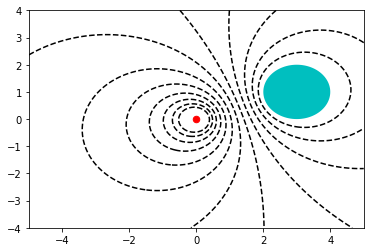

In [42]:
x = np.linspace(-5,5,145); 
y = np.linspace(-4,4,115); 
[xx,yy] = np.meshgrid(x,y); 
zz = xx+1j*yy;
nptss=50
pt=np.arange(-nptss,nptss+1)
z= c+ r*np.exp(1j*np.pi*np.transpose(pt)/nptss)
uu = disk1_fun(zz)

b1 = np.arange(-3,0,0.25)
#ax.set_aspect('equal')
plt.fill(z.real,z.imag,'C')
#plt.plot(z,'b')
#plt.figure(figsize=(6,6))
#plt.axis([-5,5,-4,4])
plt.contour(xx,yy,uu,levels = b1,colors ='k')
plt.plot(0,0,'.r',markersize=13)
plt.show()

In [23]:
## Checking the convergence as n increases

In [43]:
def disk_uz(N,zz):
    c=complex(3,1)  # center
    r=1             # radius of disk
    npts=3*N   # Make the points on the boundary
    A=np.ones((npts,2*N+1))
    pt=np.arange(1,npts+1)
    z= c+ r*np.exp(2j*np.pi*np.transpose(pt)/npts)
    rhs=-np.log(abs(z))+np.log(abs(z-c)) #forms the right hand side
    for k in range(1,N+1):           #forms the matrix  
        A[:,2*k-1]=((z-c)**(-k)).real
        A[:,2*k]=((z-c)**(-k)).imag
    a = np.linalg.lstsq(A,rhs,rcond=-1)[0] # solves for the coefficients
    
    #computing the value of u for a specific value of zz
    u=np.log(abs(zz))-np.log(abs(zz-c)) + a[0]
    for k in range(1,N+1):
        u= np.where(np.abs(zz-c)<r, np.nan,u)
        u=u+ a[2*k -1]*((zz-c)**(-k)).real+a[2*k]*((zz-c)**(-k)).imag
    return u  


In [ ]:
## Checking the accuracy for different values of n.

In [62]:
for i in [4,6,8,10,12]: # looping over selected values of n
    H=disk_uz(i,1) #  computes the value of u(1) at different values of z
    print(H) # prints the value of u(1)

-1.8054690503953517
-1.8054590519972622
-1.8054589570998107
-1.805458956321588
-1.80545895632188
-1.8054589563221133


In [44]:
##Suppose we take N=20 as the best approximate value(best-case) and take zz = 1

In [63]:
ff=disk_uz(20,1)  # ff denotes the best approximate value of u(1)
ff

-1.8054589563221133

In [66]:
def fun_uu(n):
    'This function computes the value of u(1) at different values of n'
    ut=[]
    for i in range(n):
        u=disk_uz(i,1)
        ut.append(u)
    return(ut)

In [67]:

y=fun_uu(20) # List of different values of u(1) for n in range(20)
E=(abs(ff-y)) # Computes the error

In [68]:
## plotting the error versus the number of expansion terms

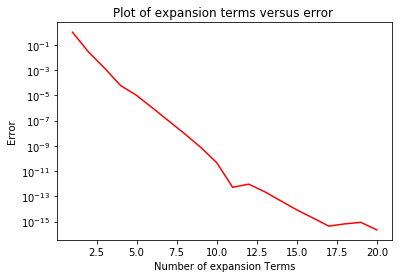

In [72]:
x=np.linspace(1,20,20)
plt.semilogy(x,E,'r')
plt.xlabel('Number of expansion Terms')
plt.ylabel('Error')
plt.title('Plot of expansion terms versus error ')
plt.savefig('error_uz.png')
plt.show()
